In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from datetime import datetime
import datetime
import dateutil
from dateutil import parser
%matplotlib inline

In [94]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y %H:%M:%S')

In [122]:
#pol = pd.read_csv('data_pollution.csv', parse_dates = ['last_update'],date_parser = dateparse)

In [9]:
pol = pd.read_csv('data_pollution.csv')
pol.head()

,Unnamed: 0,city,country,id,last_update,pollutant_avg,pollutant_id,pollutant_max,pollutant_min,pollutant_unit,state,station
0,0,Amaravati,India,1,17-03-2018 08:00:00,80.0,PM2.5,134.0,28.0,NaN,Andhra_Pradesh,"Secretariat, Amaravati - APPCB"
1,1,Amaravati,India,2,17-03-2018 08:00:00,77.0,PM10,106.0,36.0,NaN,Andhra_Pradesh,"Secretariat, Amaravati - APPCB"
2,2,Amaravati,India,3,17-03-2018 08:00:00,21.0,NO2,46.0,9.0,NaN,Andhra_Pradesh,"Secretariat, Amaravati - APPCB"
3,3,Amaravati,India,4,17-03-2018 08:00:00,3.0,NH3,5.0,2.0,NaN,Andhra_Pradesh,"Secretariat, Amaravati - APPCB"
4,4,Amaravati,India,5,17-03-2018 08:00:00,15.0,SO2,60.0,1.0,NaN,Andhra_Pradesh,"Secretariat, Amaravati - APPCB"


In [10]:
from functools import partial
to_datetime_fmt = partial(pd.to_datetime, format='%d-%m-%Y %H:%M:%S')

In [11]:
pol['last_update'] = pol['last_update'].apply(to_datetime_fmt)

In [12]:
pol.dtypes

Unnamed: 0                 int64
city                      object
country                   object
id                         int64
last_update       datetime64[ns]
pollutant_avg            float64
pollutant_id              object
pollutant_max            float64
pollutant_min            float64
pollutant_unit           float64
state                     object
station                   object
dtype: object

In [13]:
pol['last_update'] = pol['last_update'].dt.strftime('%Y-%m-%d')

In [14]:
pol['last_update'] = pd.to_datetime(pol['last_update'])

In [15]:
pol.head()

,Unnamed: 0,city,country,id,last_update,pollutant_avg,pollutant_id,pollutant_max,pollutant_min,pollutant_unit,state,station
0,0,Amaravati,India,1,2018-03-17,80.0,PM2.5,134.0,28.0,NaN,Andhra_Pradesh,"Secretariat, Amaravati - APPCB"
1,1,Amaravati,India,2,2018-03-17,77.0,PM10,106.0,36.0,NaN,Andhra_Pradesh,"Secretariat, Amaravati - APPCB"
2,2,Amaravati,India,3,2018-03-17,21.0,NO2,46.0,9.0,NaN,Andhra_Pradesh,"Secretariat, Amaravati - APPCB"
3,3,Amaravati,India,4,2018-03-17,3.0,NH3,5.0,2.0,NaN,Andhra_Pradesh,"Secretariat, Amaravati - APPCB"
4,4,Amaravati,India,5,2018-03-17,15.0,SO2,60.0,1.0,NaN,Andhra_Pradesh,"Secretariat, Amaravati - APPCB"


In [16]:
pol = pol.drop(pol.columns[0], axis=1)

In [17]:
pol = pol.drop(['id'], axis = 1)

In [18]:
pol = pol.drop(['station'], axis = 1)

In [19]:
pol = pol.drop(['pollutant_unit'], axis = 1)

In [20]:
pol.set_index('last_update', inplace=True)

In [21]:
pol.head(5)

,city,country,pollutant_avg,pollutant_id,pollutant_max,pollutant_min,state
last_update,,,,,,,
2018-03-17,Amaravati,India,80.0,PM2.5,134.0,28.0,Andhra_Pradesh
2018-03-17,Amaravati,India,77.0,PM10,106.0,36.0,Andhra_Pradesh
2018-03-17,Amaravati,India,21.0,NO2,46.0,9.0,Andhra_Pradesh
2018-03-17,Amaravati,India,3.0,NH3,5.0,2.0,Andhra_Pradesh
2018-03-17,Amaravati,India,15.0,SO2,60.0,1.0,Andhra_Pradesh


In [16]:
#Imuputing the missing values
from sklearn.preprocessing import Imputer

In [17]:
my_imputer = Imputer()

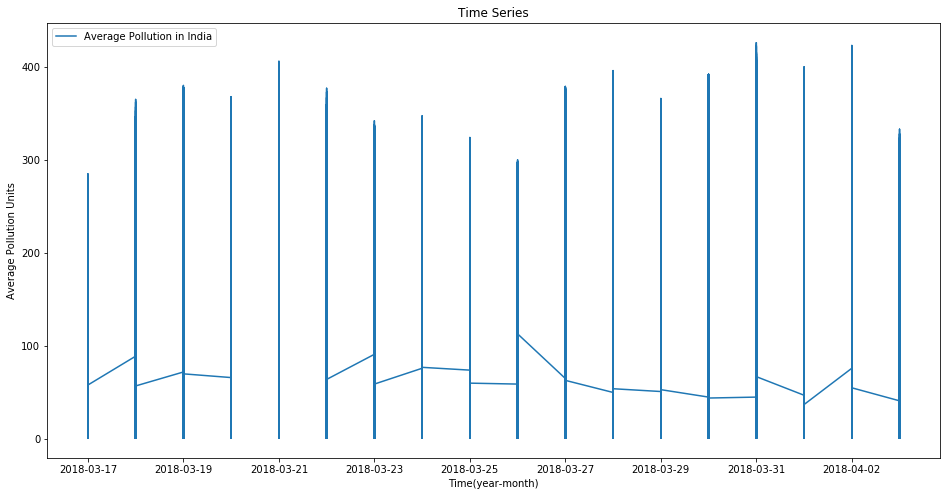

In [18]:

plt.figure(figsize=(16,8))
plt.plot(pol['pollutant_avg'], label='Average Pollution in India')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Average Pollution Units")
plt.legend(loc='best')
plt.show()

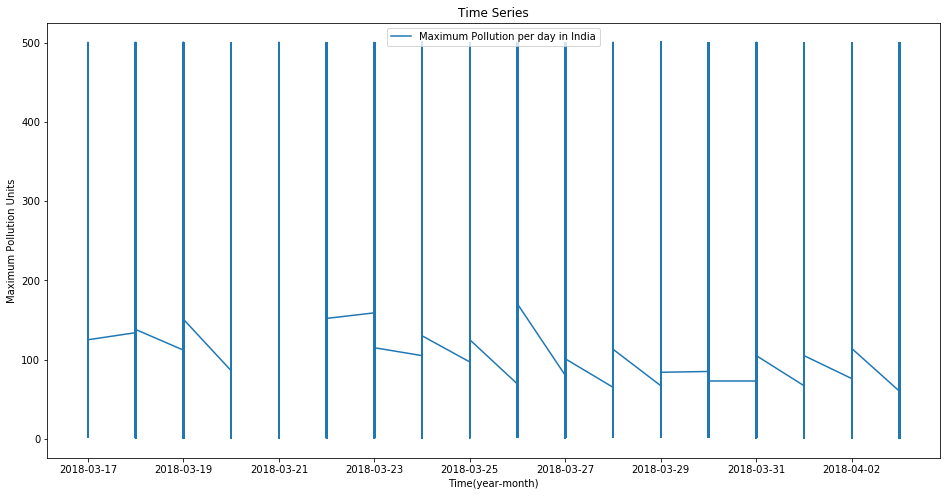

In [23]:

plt.figure(figsize=(16,8))
plt.plot(pol['pollutant_max'], label='Maximum Pollution per day in India')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Maximum Pollution Units")
plt.legend(loc='best')
plt.show()

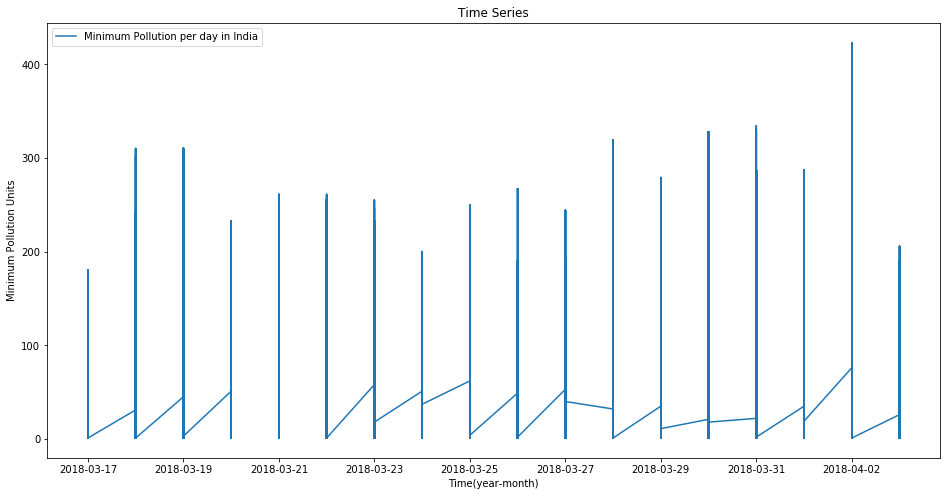

In [24]:

plt.figure(figsize=(16,8))
plt.plot(pol['pollutant_min'], label='Minimum Pollution per day in India')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Minimum Pollution Units")
plt.legend(loc='best')
plt.show()

In [23]:
#Checking the Stationarity of the Series
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Rolling Statistics
    roll_mean = pd.rolling_mean(timeseries, window = 12)
    #print(roll_mean)
    roll_std = pd.rolling_std(timeseries, window = 12)
    #print(roll_std)
    
    #Plot the statistics
    plt.figure(figsize=(16,8))
    orig = plt.plot(timeseries, color = 'red', label = 'Original Data')
    mean = plt.plot(roll_mean, color = 'blue', label = 'Rolling Mean')
    std = plt.plot(roll_std, color = 'green', label = 'Rolling Standard Deviation')
    plt.legend(loc = 'best')
    plt.title('Original Series with Rolling Mean and Standard Deviation')
    plt.show()
    
    #Dickey-Fuller Test to check the p-value
    print("Results of Dickey Fuller Test")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print(dfoutput)

In [24]:
df = pol['pollutant_avg']
df.dropna(inplace = True)

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


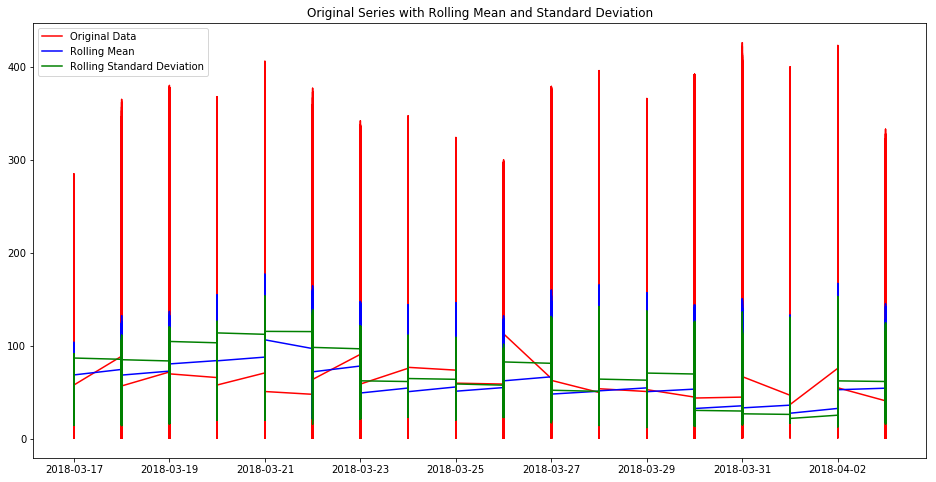

Results of Dickey Fuller Test


In [ ]:
test_stationarity(df)

In [21]:
from statsmodels.tsa.stattools import acf, pacf

In [22]:
lag_acf = acf(df, nlags = 10)
lag_pacf = pacf(df, nlags = 10, method = 'ols')

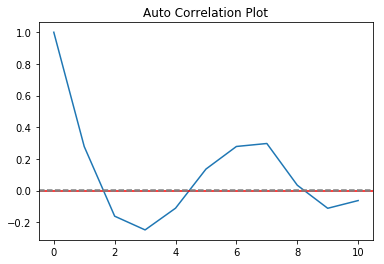

In [67]:
#Plotting ACF function 
plt.subplot(111)
plt.plot(lag_acf)
plt.axhline(y = 0, color = 'red')
plt.axhline(y=-1.96/(np.sqrt(len(df))),linestyle='--',color='gray')
plt.axhline(y=+1.96/(np.sqrt(len(df))), linestyle = '--',color = 'gray')
#ax = plt.gca()
#ax.set_ylim([-0.02,0.02])
plt.title('Auto Correlation Plot')

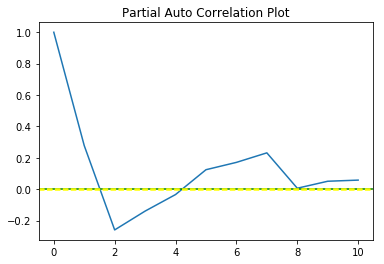

In [23]:
plt.subplot(111)
plt.plot(lag_pacf)
plt.axhline(y = 0, color = 'green')
plt.axhline(y = -1.96/(np.sqrt(len(df))), linestyle = '--', color = 'yellow')
plt.axhline(y = +1.96/(np.sqrt(len(df))), linestyle = '--', color = 'yellow')
#ax = plt.gca()
#ax.set_ylim([-0.02,0.02])
plt.title('Partial Auto Correlation Plot')

Autoregressive Model 

In [24]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


last_update
2018-03-17     69.357538
2018-03-17     72.316640
2018-03-17     69.276023
2018-03-17     50.448953
2018-03-17     58.654520
2018-03-17     67.518365
2018-03-17     71.061172
2018-03-17     62.288350
2018-03-17     87.892830
2018-03-17     72.104661
2018-03-17     51.373203
2018-03-17     56.337067
2018-03-17     68.141510
2018-03-17     76.676397
2018-03-17     74.169980
2018-03-17     57.604474
2018-03-17     69.562929
2018-03-17     68.281685
2018-03-17     51.401057
2018-03-17     64.017610
2018-03-17     70.851091
2018-03-17     68.911749
2018-03-17     77.873717
2018-03-17     65.824239
2018-03-17     48.810535
2018-03-17     66.118063
2018-03-17     90.651381
2018-03-17    110.872015
2018-03-17     59.985458
2018-03-17     52.332587
                 ...    
2018-04-03     73.952799
2018-04-03     61.357182
2018-04-03    116.963111
2018-04-03     82.383188
2018-04-03     53.186931
2018-04-03     49.069768
2018-04-03     73.336753
2018-04-03     59.662874
2018-04-03   

C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


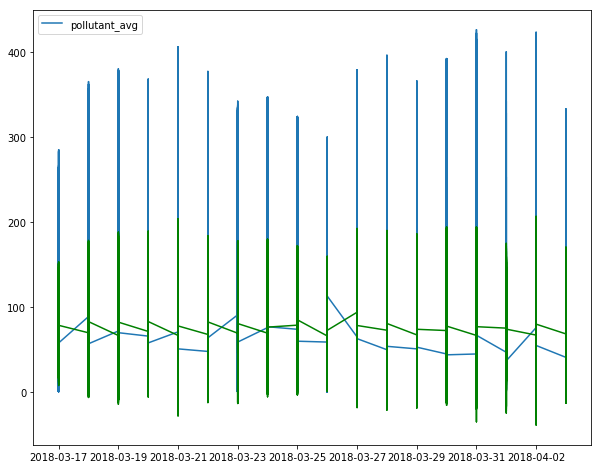

In [25]:
ar_model = ARIMA(df, order=(2,0,0))
results_ar = ar_model.fit()
print(ar_model)
print(results_ar)
print(results_ar.fittedvalues)
plt.figure(figsize=(10,8))
plt.plot(df)
plt.plot(results_ar.fittedvalues, color = 'green')
plt.legend(loc = 'best')

Moving Average Model

C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


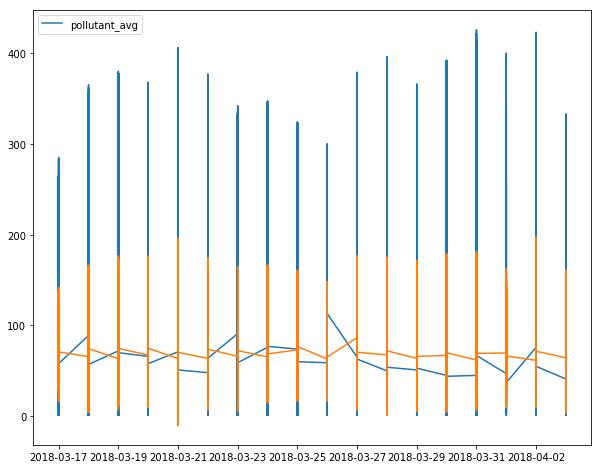

In [26]:
ma_model = ARIMA(df, order = (0,0,2))
results_ma = ma_model.fit()
plt.figure(figsize=(10,8))
plt.plot(df)
plt.plot(results_ma.fittedvalues)
plt.legend(loc = 'best')

Combined Model

C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Root Mean Square Error for the model is 
 0.0022609037657437742


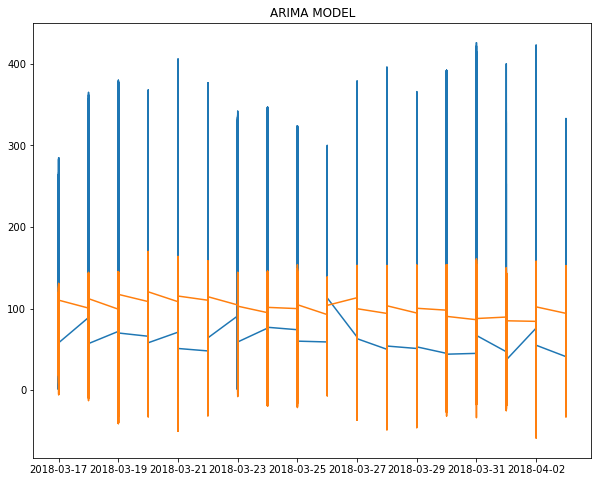

In [29]:
arma_model = ARIMA(df, order=(2,0,2))
results_arma = arma_model.fit()
plt.figure(figsize = (10,8))
plt.plot(df)
plt.plot(results_arma.fittedvalues)
plt.title('ARIMA MODEL')
rmse = (sum(results_arma.fittedvalues - df)**2)/len(df)
print("Root Mean Square Error for the model is \n" , rmse)

In [40]:
rmse= (sum(results_arma.fittedvalues - df))**2/len(df)

print('RSS:', rmse)

RSS: 0.0022609037657437742
